<a href="https://colab.research.google.com/github/arwakhalidw/2024-GP-Group6/blob/main/AlzheimerPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
# @title Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from scipy.stats import zscore
import scipy.stats as stats
!pip install mrmr_selection
from mrmr import mrmr_classif

In [38]:
# @title Reading and Copying the Dataset
# Read the dataset
dataset = pd.read_csv("alzheimer.csv")
# Copy the dataset
dataframe = dataset.copy() # to keep the original dataset unchanged

There are 10 features, they are as follows:
1.  Group is the Class lable
2.  M/F the gender of the patients
3.  Age is the Age of the patient
4.  EDUC are Years of Education
5.  SES are Socioeconomic Status on a scale from 1 to 5
6.  MMSE is Mini Mental State Examination
7.  CDR is Clinical Dementia Rating
8.  eTIV is Estimated total intracranial volume
9.  nWBV is Normalize Whole Brain Volume
10.  ASF is Atlas Scaling Factor







In [39]:
# @title Check the Data Shape
dataframe.shape

(373, 10)

In [40]:
# @title Display the First 5 Rows
dataframe.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [41]:
# @title Describe the Numeric Values in the Dataset
dataframe.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


# Visualization

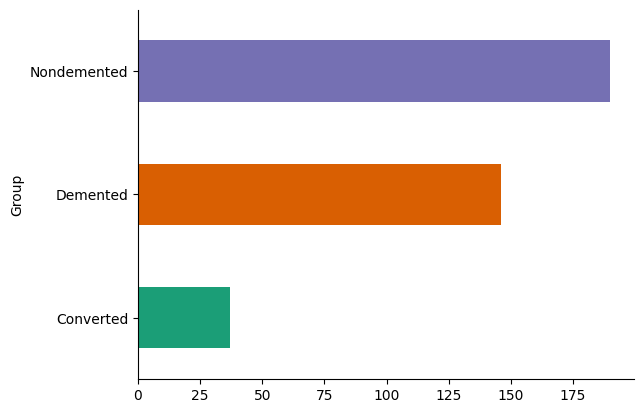

In [42]:
# @title Group

dataframe.groupby('Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

we have three categories:
1. Demented:
which is a lable given to patients with Alzhiemer
2. Nondemented:
which is a lable given to patients without Alzhiemer
3. Converted:
which is a lable given to patients diagnosed first to not have Alzhiemer but were converted to be patients with Alzhiemer

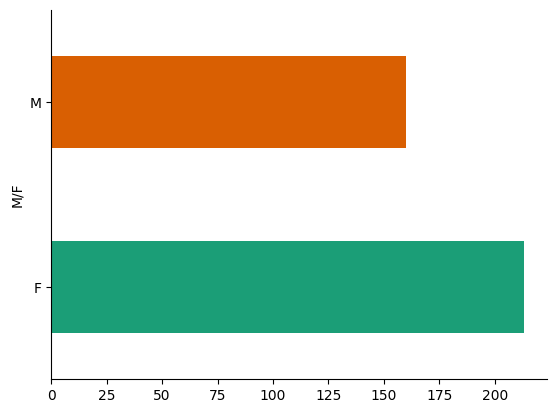

In [43]:
# @title M/F

dataframe.groupby('M/F').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

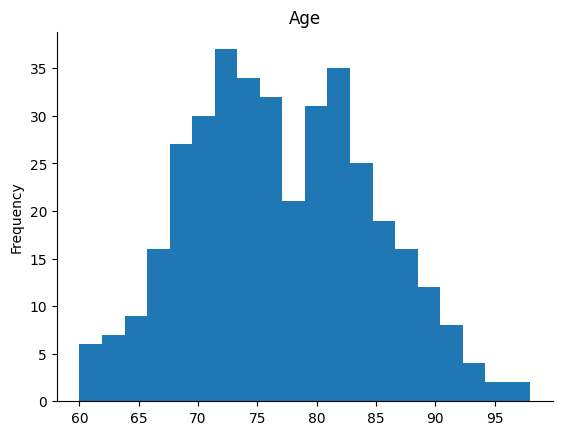

In [44]:
# @title Age

dataframe['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

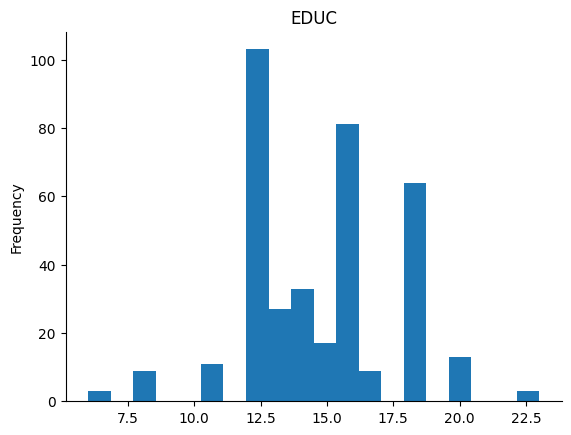

In [45]:
# @title EDUC

dataframe['EDUC'].plot(kind='hist', bins=20, title='EDUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

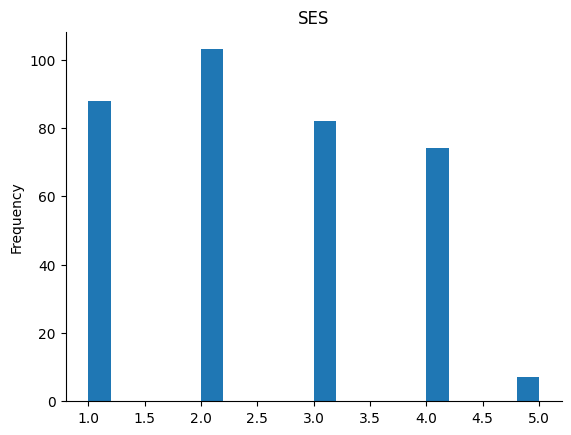

In [46]:
# @title SES

dataframe['SES'].plot(kind='hist', bins=20, title='SES')
plt.gca().spines[['top', 'right',]].set_visible(False)

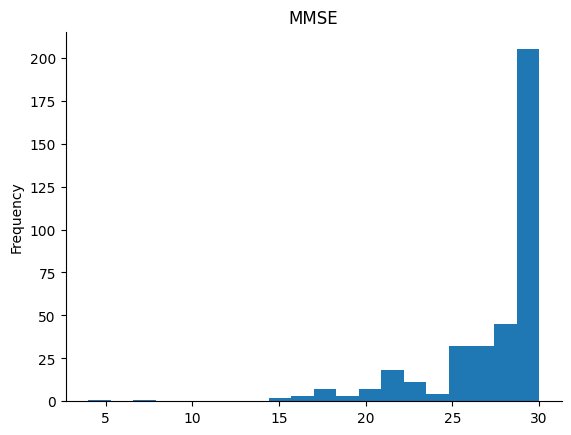

In [47]:
# @title MMSE

dataframe['MMSE'].plot(kind='hist', bins=20, title='MMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

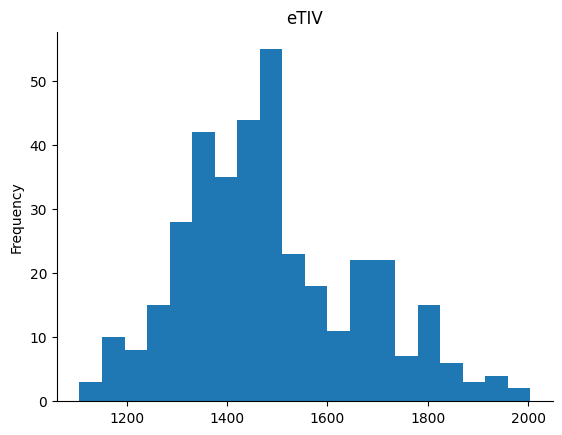

In [48]:
# @title eTIV

dataframe['eTIV'].plot(kind='hist', bins=20, title='eTIV')
plt.gca().spines[['top', 'right',]].set_visible(False)

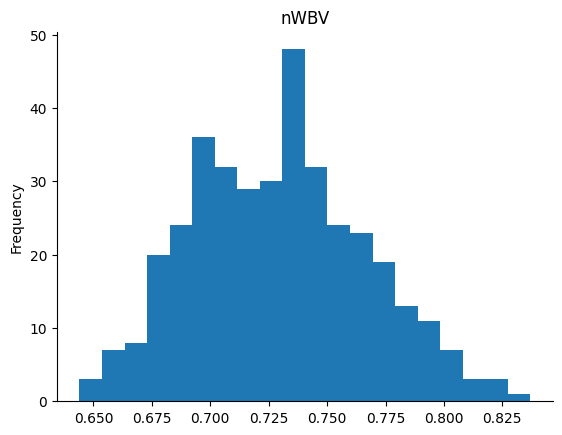

In [49]:
# @title nWBV

dataframe['nWBV'].plot(kind='hist', bins=20, title='nWBV')
plt.gca().spines[['top', 'right',]].set_visible(False)

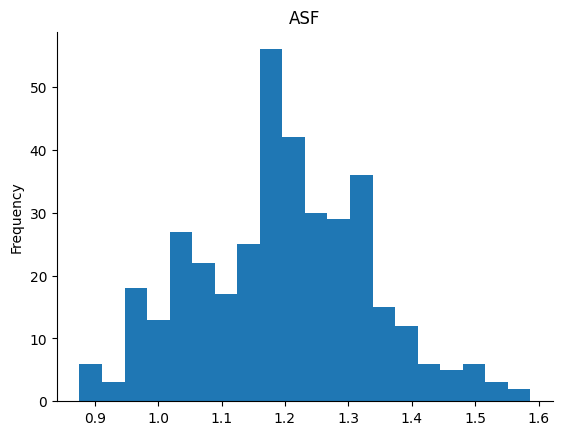

In [50]:
# @title ASF

dataframe['ASF'].plot(kind='hist', bins=20, title='ASF')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Changing The converted records to be demented

In [51]:
for index, row in dataframe.iterrows():
  if row['Group'] == 'Converted':
    dataframe.at[index, 'Group'] = 'Demented'

conuter = dataframe['Group'].value_counts()
print(conuter)

Nondemented    190
Demented       183
Name: Group, dtype: int64


# Data Cleaning


## Outlier Detection

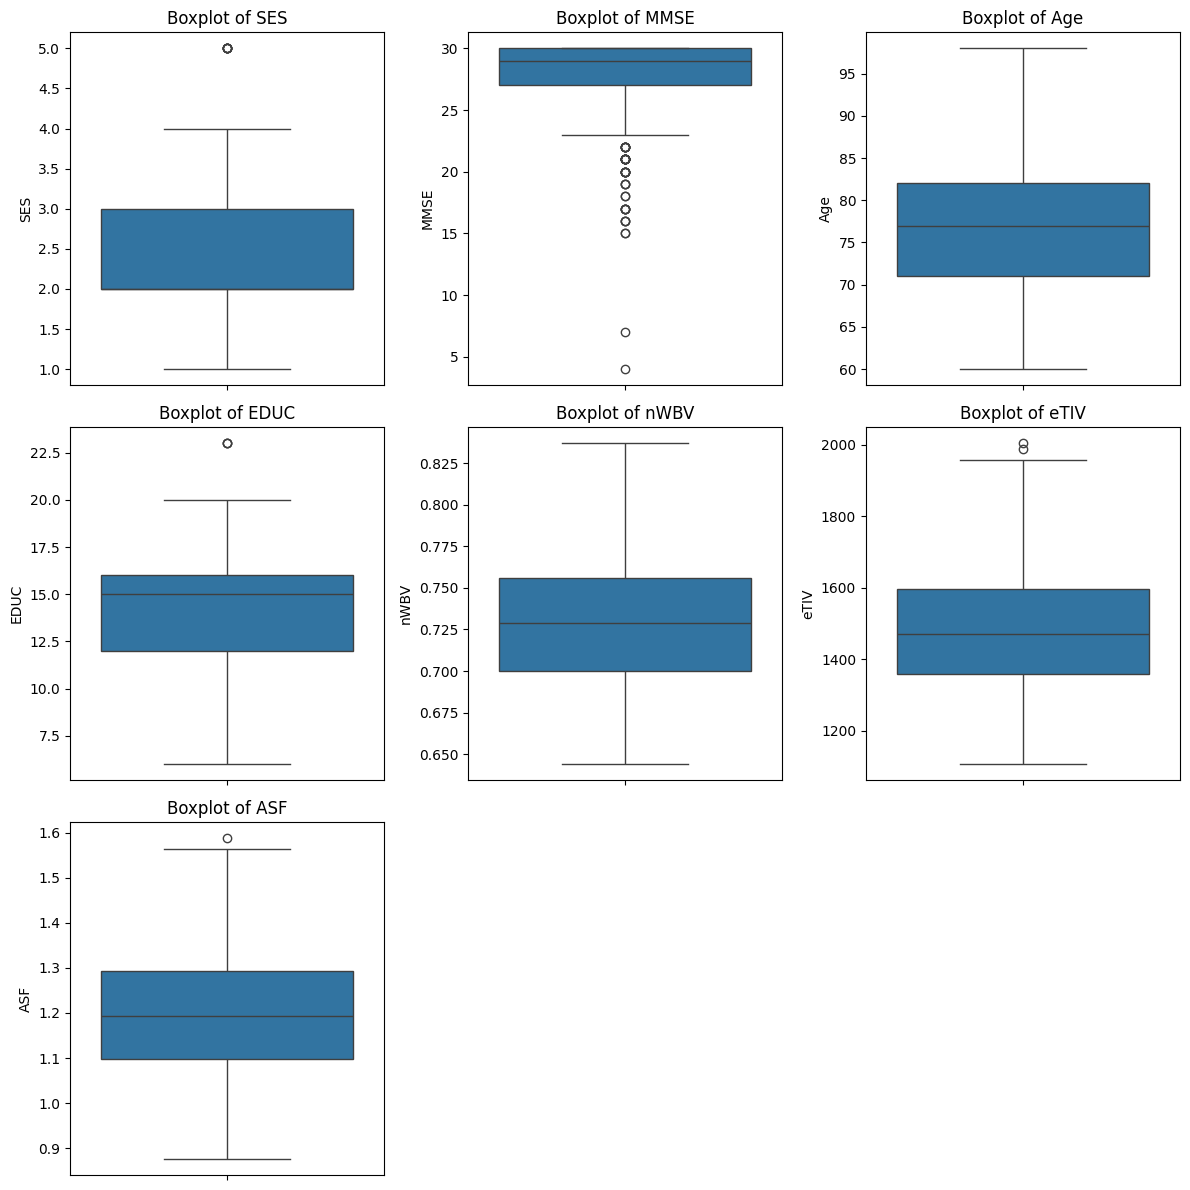

In [52]:
numeric_features = ['SES', 'MMSE', 'Age', 'EDUC', 'nWBV', 'eTIV', 'ASF']
std_dev=3

plt.figure(figsize=(12, 12))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(dataframe[feature])
    plt.title(f'Boxplot of {feature}')


# Adjust layout to prevent overlapping of subplots
plt.tight_layout()




## Outlier Removal

Number of rows after outlier removal: 361


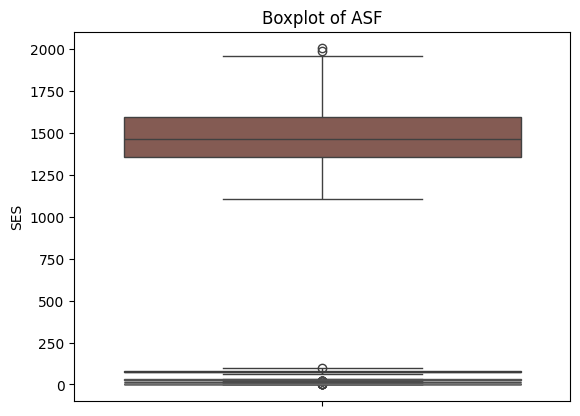

In [53]:
for i, feature in enumerate(numeric_features, 1):
  Q1 = dataframe[feature].quantile(0.25)
  Q3 = dataframe[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - std_dev * IQR
  upper_bound = Q3 + std_dev * IQR

 # Remove outliers
  outliers = (dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)
  dataframe = dataframe[~outliers]

  sns.boxplot(data=dataframe[feature])
  plt.title(f'Boxplot of {feature}')

print("Number of rows after outlier removal:", len(dataframe))

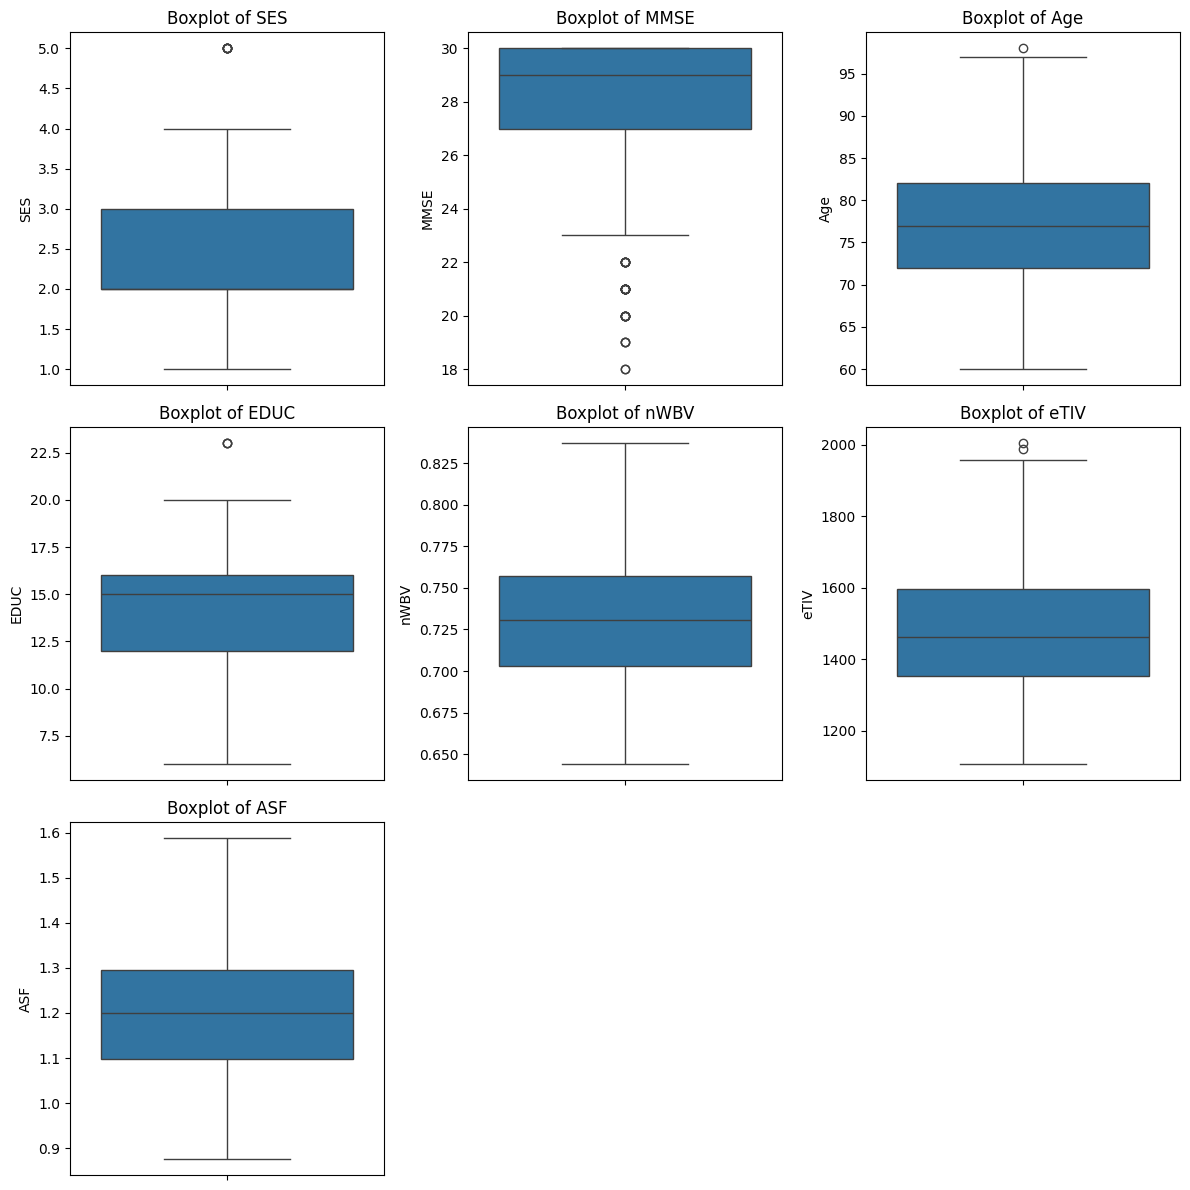

In [54]:
plt.figure(figsize=(12, 12))
for i, feature in enumerate(numeric_features, 1):
  plt.subplot(3, 3, i)
  sns.boxplot(data=dataframe[feature])
  plt.title(f'Boxplot of {feature}')
plt.tight_layout()

## Handeling Missing Values

In [55]:
# @title Check if Any Column has Null values in the Dataset
dataframe.isnull().any()

Group    False
M/F      False
Age      False
EDUC     False
SES       True
MMSE      True
CDR      False
eTIV     False
nWBV     False
ASF      False
dtype: bool

As displayed, the SES and MMSE columns contain missing values. First, we'll check whether or not the data for these columns is normally distrubuted using the Shapiro-Wilk test.

In [56]:
stat, p_value = shapiro(dataframe['SES'])

print('Shapiro-Wilk test for SES:')
if p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data appears to be normally distributed.")

stat, p_value = shapiro(dataframe['MMSE'])

print('Shapiro-Wilk test for MMSE:')
if p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data appears to be normally distributed.")


## Since the data in both columns is normally distributed, we can either perform median or mean imputation.
dataframe['SES'].fillna(dataframe['SES'].mean(), inplace=True)
dataframe['MMSE'].fillna(dataframe['MMSE'].mean(), inplace=True)


Shapiro-Wilk test for SES:
The data appears to be normally distributed.
Shapiro-Wilk test for MMSE:
The data appears to be normally distributed.


In [57]:
## Since the data in both columns is normally distributed, we can either perform median or mean imputation.
dataframe['SES'].fillna(dataframe['SES'].mean(), inplace=True)
dataframe['MMSE'].fillna(dataframe['MMSE'].mean(), inplace=True)

## Check for missing values again
dataframe.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

# Encoding

## Encoding the Group attribute to be 0 for Demented and 1 for Nondemented:

In [58]:
#for index, row in dataframe.iterrows():
 # if row['Group'] == 'Demented':
  #  dataframe.at[index, 'Group'] = '0'
  #else:
    # Nondemented
   # dataframe.at[index, 'Group'] = '1'

#conuter = dataframe['Group'].value_counts()
#print(conuter)

## Encoding the M/F attribute to be 0 for M (male) and 1 for F (female)

In [59]:
for index, row in dataframe.iterrows():
  if row['M/F'] == 'M':
    dataframe.at[index, 'M/F'] = '0'
  else:
    # Nondemented
    dataframe.at[index, 'M/F'] = '1'

conuter = dataframe['M/F'].value_counts()
print(conuter)

1    210
0    151
Name: M/F, dtype: int64


# Discretizing the Age attribute

the result will be as follows : 60-69, 70-79, 80-89, =>90

In [60]:
bins = [60, 70, 80, 90, float('inf')]
labels = ['60-69', '70-79', '80-89', '>=90']
dataframe['Age'] = pd.cut(dataframe['Age'], bins=bins, labels=labels, right=False)

print(dataframe)

           Group M/F    Age  EDUC      SES  MMSE  CDR  eTIV   nWBV    ASF
0    Nondemented   0  80-89    14  2.00000  27.0  0.0  1987  0.696  0.883
1    Nondemented   0  80-89    14  2.00000  30.0  0.0  2004  0.681  0.876
2       Demented   0  70-79    12  2.44152  23.0  0.5  1678  0.736  1.046
3       Demented   0  70-79    12  2.44152  28.0  0.5  1738  0.713  1.010
4       Demented   0  80-89    12  2.44152  22.0  0.5  1698  0.701  1.034
..           ...  ..    ...   ...      ...   ...  ...   ...    ...    ...
368     Demented   0  80-89    16  1.00000  28.0  0.5  1693  0.694  1.037
369     Demented   0  80-89    16  1.00000  26.0  0.5  1688  0.675  1.040
370  Nondemented   1  60-69    13  2.00000  30.0  0.0  1319  0.801  1.331
371  Nondemented   1  60-69    13  2.00000  30.0  0.0  1327  0.796  1.323
372  Nondemented   1  60-69    13  2.00000  30.0  0.0  1333  0.801  1.317

[361 rows x 10 columns]


# Exploratory Dataset Analysis



##Univariate Analysis

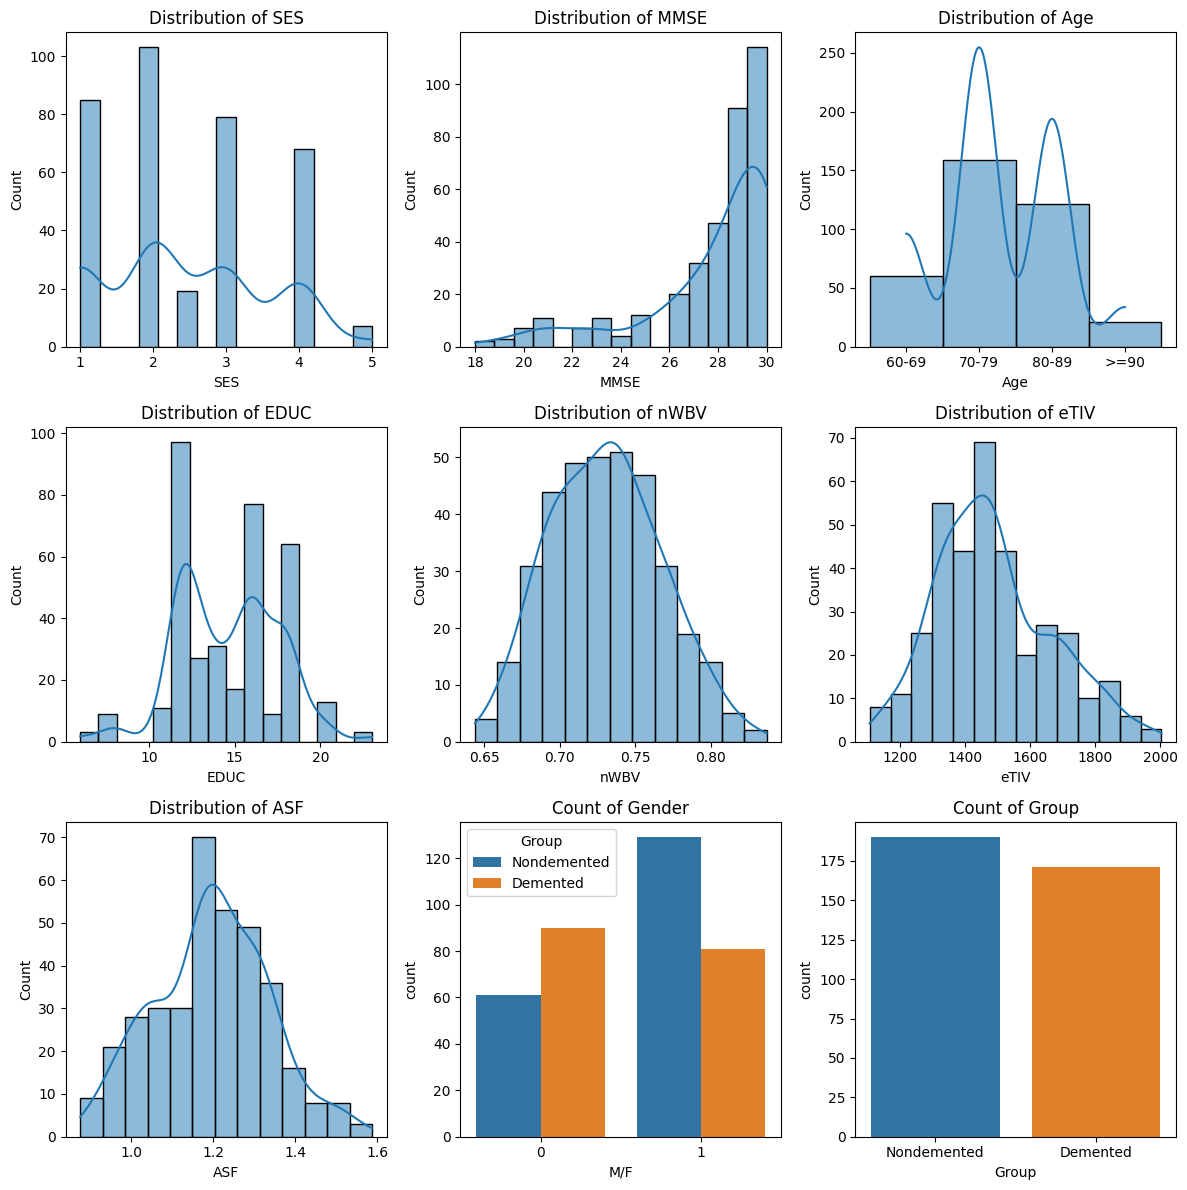

In [61]:
## Numeric Values
numeric_features = ['SES', 'MMSE', 'Age', 'EDUC', 'nWBV', 'eTIV', 'ASF']

plt.figure(figsize=(12, 12))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dataframe[feature], kde=True)
    plt.title(f'Distribution of {feature}')

## Categorical Values

plt.subplot(3, 3, 8)
sns.countplot(data=dataframe, x=dataframe['M/F'], hue='Group')
plt.title(f'Count of Gender')

plt.subplot(3, 3, 9)
sns.countplot(data=dataframe, x=dataframe['Group'], hue='Group')
plt.title(f'Count of Group')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Show plot
plt.show()


 ## Bivariate Analysis

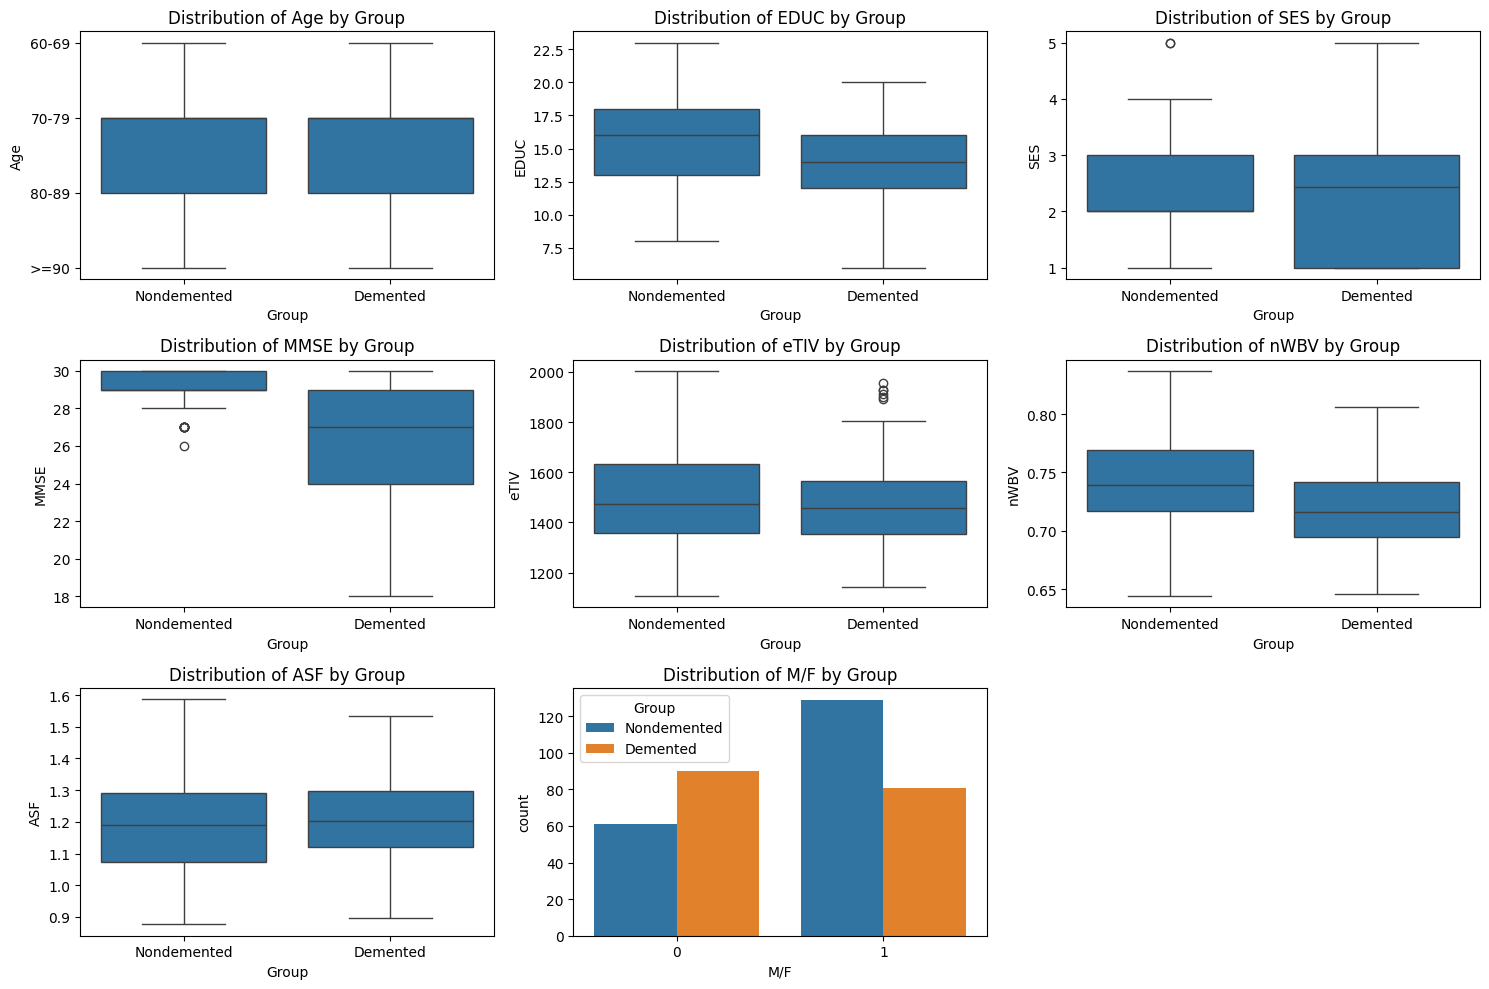

In [62]:
# Select numeric columns (excluding the 'group' column)
numeric_columns = ['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
plt.figure(figsize=(15, 10))

# Plot each numeric column against the 'group' column
for i, column in enumerate(numeric_columns,1):

    plt.subplot(3, 3, i)
    sns.boxplot(x='Group', y=column, data=dataframe)
    plt.title(f'Distribution of {column} by Group')
    plt.xlabel('Group')
    plt.ylabel(column)


plt.subplot(3, 3, 8)
sns.countplot(x=dataframe['M/F'], hue='Group', data=dataframe)
plt.title(f'Distribution of M/F by Group')
plt.legend(title='Group')

plt.tight_layout()
plt.show()




##Feature Selection

### Applying mRMR technique

In [93]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9
0,Nondemented,0,80-89,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,0,80-89,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,0,70-79,12,2.44152,23.0,0.5,1678,0.736,1.046
3,Demented,0,70-79,12,2.44152,28.0,0.5,1738,0.713,1.01
4,Demented,0,80-89,12,2.44152,22.0,0.5,1698,0.701,1.034


In [89]:
# Assuming the features are stored in columns 'feature1', 'feature2', etc.
X = dataframe[['Age', 'MMSE', 'M/F', 'EDUC', 'eTIV', 'CDR', 'ASF', 'nWBV', 'SES']].values

# Assuming the target variable is stored in column 'target'
y = dataframe['Group'].values
selected_features = mrmr_classif(X=x, y=y, K=6)

KeyError: "None of [Index(['Age', 'MMSE', 'M/F', 'EDUC', 'eTIV', 'CDR', 'ASF', 'nWBV', 'SES'], dtype='object')] are in the [columns]"